## Preambule

In [1]:
import warnings

import numpy as np
import xarray as xr

warnings.simplefilter(action="ignore", category=FutureWarning)

# Plotting
import matplotlib.pyplot as plt

## Reading

In [3]:
path_data = "K:/ECEMF/T5.2/"
xr_dataread = xr.open_dataset(path_data + "xr_dataread.nc", engine="netcdf4")

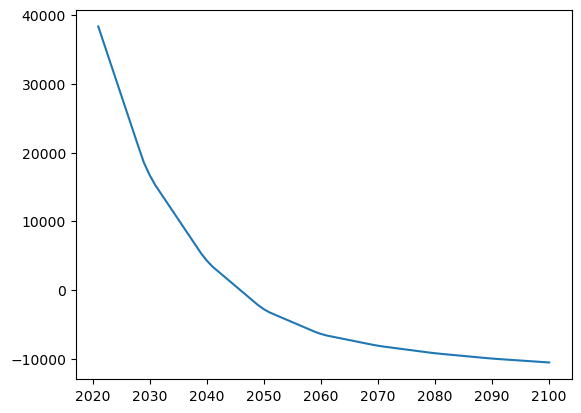

In [51]:
plt.plot(
    np.arange(2021, 2101),
    xr_dataread.CO2_globe.sel(
        Temperature=1.5,
        Risk=0.5,
        Timing="Immediate",
        NonCO2red=0.5,
        NegEmis=0.5,
        Time=np.arange(2021, 2101),
    ),
)

## Allocation by population

In [52]:
popfrac_2021 = xr_dataread.Population.sel(Time=2021, Scenario="SSP2") / xr_dataread.Population.sel(
    Time=2021, Region="EARTH", Scenario="SSP2"
)
xr_bycapita = (xr_dataread.Budget * popfrac_2021).drop_vars(
    ["Time", "variable", "Version", "source", "Scenario"]
)

In [53]:
xr_bycapita.astype("float32").to_netcdf(path_data + "Budgets_percapita.nc", format="NETCDF4")

In [56]:
xr_bycapita.to_dataframe(name="Per capita allocation in Gt CO2").to_csv(
    path_data + "Budgets_percapita.csv"
)

In [57]:
xr_bycapita.sel(Temperature=1.5, Region="EARTH")

<xarray.DataArray (Risk: 5, NonCO2red: 5)>
array([[  30.16256521,  177.16256521,  216.36256521,  304.56256521,
         511.36256521],
       [ 111.46518626,  258.46518626,  297.66518626,  385.86518626,
         592.66518626],
       [ 193.33288431,  340.33288431,  379.53288431,  467.73288431,
         674.53288431],
       [ 313.23324474,  460.23324474,  499.43324474,  587.63324474,
         794.43324474],
       [ 532.37262167,  679.37262167,  718.57262167,  806.77262167,
        1013.57262167]])
Coordinates:
    Temperature  float64 1.5
  * Risk         (Risk) float64 0.17 0.33 0.5 0.67 0.83
  * NonCO2red    (NonCO2red) float64 0.1 0.33 0.5 0.67 0.9
    Region       <U16 'EARTH'